In [4]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lime.lime_tabular import LimeTabularExplainer

In [ ]:

# Step 2: Load Your Data
df = pd.read_csv("/content/sample_data/ML_DATASET.csv")  # Update the path to your dataset

# Step 3: Exploratory Data Analysis (EDA)
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# Basic Statistics
print("\nBasic Statistics:\n", df.describe())

# Visualize distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Final_Marks'], kde=True)
plt.title('Distribution of Final Marks')
plt.xlabel('Final Marks')
plt.ylabel('Frequency')
plt.show()

Dataset Shape: (681, 1025)

Data Types:
 codee_embedding_0    float64
codee_embedding_1    float64
codee_embedding_2    float64
codee_embedding_3    float64
codee_embedding_4    float64
                      ...   
com_embedding_252    float64
com_embedding_253    float64
com_embedding_254    float64
com_embedding_255    float64
Final_Marks          float64
Length: 1025, dtype: object

Missing Values:
 sol_embedding_199    1
sol_embedding_200    1
sol_embedding_201    1
sol_embedding_202    1
sol_embedding_203    1
                    ..
com_embedding_252    1
com_embedding_253    1
com_embedding_254    1
com_embedding_255    1
Final_Marks          1
Length: 570, dtype: int64


In [6]:
# Step 4: Data Cleaning
# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

# Outlier detection using IQR
Q1 = df['Final_Marks'].quantile(0.25)
Q3 = df['Final_Marks'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Final_Marks'] >= (Q1 - 1.5 * IQR)) & (df['Final_Marks'] <= (Q3 + 1.5 * IQR))]

# Step 5: Data Preprocessing
# Separate features and target variable
X = df.drop(columns=['Final_Marks'])
y = df['Final_Marks']

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
# Assuming X and y are defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(random_state=42)
lasso_model = Lasso(random_state=42)
elasticnet_model = ElasticNet(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
catboost_model = CatBoostRegressor(silent=True, random_state=42)

# Fit the models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elasticnet_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define evaluation function with adjusted MAPE calculation
def evaluate_model(model, X_test, y_test, epsilon=1e-10):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    # MAPE calculation with epsilon to avoid division by zero
    mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, mape, r2

# Evaluate each model and store the results in a DataFrame
model_results = []

models = {
    'Linear Regression': linear_model,
    'Ridge Regression': ridge_model,
    'Lasso Regression': lasso_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'CatBoost': catboost_model
}

# Loop through models, evaluate, and collect results
for name, model in models.items():
    mse, rmse, mae, mape, r2 = evaluate_model(model, X_test, y_test)
    model_results.append({'Model': name, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2})

# Convert results to a DataFrame
results_df = pd.DataFrame(model_results)
print(results_df)


               Model           MSE          RMSE           MAE          MAPE  \
0  Linear Regression  1.571016e+21  3.963604e+10  6.876143e+09  9.339146e+10   
1   Ridge Regression  3.186613e+00  1.785109e+00  1.308778e+00  2.823903e+01   
2   Lasso Regression  4.059255e+00  2.014759e+00  1.601082e+00  3.546644e+01   
3      Random Forest  3.002707e+00  1.732832e+00  1.272707e+00  2.819388e+01   
4            XGBoost  3.755634e+00  1.937946e+00  1.418819e+00  2.995265e+01   
5           CatBoost  3.113307e+00  1.764457e+00  1.302037e+00  2.802952e+01   

             R2  
0 -3.998481e+20  
1  1.889571e-01  
2 -3.314379e-02  
3  2.357640e-01  
4  4.413249e-02  
5  2.076147e-01  


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

linear_model.fit(X_train_pca, y_train)
mse, rmse, mae, mape, r2 = evaluate_model(linear_model, X_test_pca, y_test)
print(f"PCA-Adjusted Linear Regression - MSE: {mse}, RMSE: {rmse}, MAE: {mae}, MAPE: {mape}, R2: {r2}")


PCA-Adjusted Linear Regression - MSE: 3.567914404831637, RMSE: 1.8888923751319546, MAE: 1.3560844746647214, MAPE: 29.8973934333788, R2: 0.09191004740338204


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

# Load dataset
df = pd.read_csv('/content/sample_data/ML_DATASET.csv')
X = df.drop(columns=['Final_Marks'])  # Replace 'Final_Marks' with your target column
y = df['Final_Marks']

# Handle missing values
X = X.fillna(X.mean())  # Impute missing values in features
valid_indices = ~y.isnull()  # Identify rows with valid target values
X = X[valid_indices]
y = y[valid_indices]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter grid for Random Forest
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Perform hyperparameter tuning using RandomizedSearchCV
rf_search = RandomizedSearchCV(
    rf_model,
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of parameter settings sampled
    scoring=make_scorer(r2_score),  # Evaluating using R2 score
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
rf_search.fit(X_train, y_train)

# Retrieve the best model and parameters
best_rf_model = rf_search.best_estimator_
best_rf_params = rf_search.best_params_

# Evaluate the best model on the test data
y_pred = best_rf_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Store the evaluation metrics
metrics = {
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae,
    'R2': r2,
    'Best Parameters': best_rf_params
}

# Display results
print(f"Best Parameters for Random Forest: {best_rf_params}")
print(f"Performance Metrics: {metrics}")




Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import make_scorer

# Load dataset
df = pd.read_csv('/content/sample_data/ML_DATASET.csv')
X = df.drop(columns=['Final_Marks'])  # Replace 'Final_Marks' with your target column
y = df['Final_Marks']

# Handle missing values
X = X.fillna(X.mean())  # Impute missing values in features
valid_indices = ~y.isnull()  # Identify rows with valid target values
X = X[valid_indices]
y = y[valid_indices]

# Define model
model = LinearRegression()

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring_metrics = {
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'MAE': mean_absolute_error,
    'R2': r2_score,
    'MSE': mean_squared_error
}

# Cross-validation for Linear Regression
cv_results = {}
for metric_name, metric_func in scoring_metrics.items():
    scores = cross_val_score(model, X, y, scoring=make_scorer(metric_func, greater_is_better=False if metric_name == 'MAE' else True), cv=kf)
    cv_results[metric_name] = -np.mean(scores) if metric_name == 'MAE' else np.mean(scores)

print("Linear Regression Cross-Validation Results:")
print(cv_results)


Linear Regression Cross-Validation Results:
{'RMSE': 52592726821.75704, 'MAE': 7718541929.5510025, 'R2': -2.237424068289333e+21, 'MSE': 1.1112359701528315e+22}


In [3]:
from sklearn.linear_model import Ridge

# Define model
model = Ridge(random_state=42)

# Cross-validation for Ridge
cv_results = {}
for metric_name, metric_func in scoring_metrics.items():
    scores = cross_val_score(model, X, y, scoring=make_scorer(metric_func, greater_is_better=False if metric_name == 'MAE' else True), cv=kf)
    cv_results[metric_name] = -np.mean(scores) if metric_name == 'MAE' else np.mean(scores)

print("Ridge Regression Cross-Validation Results:")
print(cv_results)


Ridge Regression Cross-Validation Results:
{'RMSE': 1.8221124993249735, 'MAE': 1.3413949459015726, 'R2': 0.27151401071789916, 'MSE': 3.3322188044168835}


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

# Load dataset
df = pd.read_csv('/content/sample_data/ML_DATASET.csv')
X = df.drop(columns=['Final_Marks'])  # Replace 'Final_Marks' with your target column
y = df['Final_Marks']

# Handle missing values
X = X.fillna(X.mean())  # Impute missing values in features
valid_indices = ~y.isnull()  # Identify rows with valid target values
X = X[valid_indices]
y = y[valid_indices]

# Define model
model = Lasso(random_state=42)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring_metrics = {
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'MAE': mean_absolute_error,
    'R2': r2_score,
    'MSE': mean_squared_error
}

# Cross-validation for Lasso
cv_results = {}
for metric_name, metric_func in scoring_metrics.items():
    # Adjust scoring for metrics that are lower better (MAE, MSE, RMSE)
    if metric_name in ['MAE', 'MSE']:
        # For MAE and MSE, use greater_is_better=False and negate the result manually
        scores = cross_val_score(model, X, y, scoring=make_scorer(metric_func, greater_is_better=False), cv=kf)
        cv_results[metric_name] = -np.mean(scores)  # Negate the score since lower is better
    else:
        # For R2 and RMSE, use greater_is_better=True, no negation needed
        scores = cross_val_score(model, X, y, scoring=make_scorer(metric_func, greater_is_better=True), cv=kf)
        cv_results[metric_name] = np.mean(scores)

print("Lasso Regression Cross-Validation Results:")
print(cv_results)


Lasso Regression Cross-Validation Results:
{'RMSE': 2.1377496554507496, 'MAE': 1.733214889439805, 'R2': -0.001757753966611375, 'MSE': 4.576162734431722}


In [8]:
from sklearn.linear_model import ElasticNet

# Define model
model = ElasticNet(random_state=42)

# Cross-validation for ElasticNet
cv_results = {}
for metric_name, metric_func in scoring_metrics.items():
    scores = cross_val_score(model, X, y, scoring=make_scorer(metric_func, greater_is_better=False if metric_name == 'MAE' else True), cv=kf)
    cv_results[metric_name] = -np.mean(scores) if metric_name == 'MAE' else np.mean(scores)

print("ElasticNet Regression Cross-Validation Results:")
print(cv_results)


ElasticNet Regression Cross-Validation Results:
{'RMSE': 2.1377496554507496, 'MAE': 1.733214889439805, 'R2': -0.001757753966611375, 'MSE': 4.576162734431722}


In [9]:
from sklearn.ensemble import RandomForestRegressor

# Define model
model = RandomForestRegressor(random_state=42)

# Cross-validation for Random Forest
cv_results = {}
for metric_name, metric_func in scoring_metrics.items():
    scores = cross_val_score(model, X, y, scoring=make_scorer(metric_func, greater_is_better=False if metric_name == 'MAE' else True), cv=kf)
    cv_results[metric_name] = -np.mean(scores) if metric_name == 'MAE' else np.mean(scores)

print("Random Forest Regressor Cross-Validation Results:")
print(cv_results)



Random Forest Regressor Cross-Validation Results:
{'RMSE': 1.819401426326904, 'MAE': 1.33317175246485, 'R2': 0.27286809262718437, 'MSE': 3.31853178255559}


In [10]:
from xgboost import XGBRegressor

# Define model
model = XGBRegressor(random_state=42)


cv_results = {}
for metric_name, metric_func in scoring_metrics.items():
    scores = cross_val_score(model, X, y, scoring=make_scorer(metric_func, greater_is_better=False if metric_name == 'MAE' else True), cv=kf)
    cv_results[metric_name] = -np.mean(scores) if metric_name == 'MAE' else np.mean(scores)

print("XGBoost Cross-Validation Results:")
print(cv_results)


XGBoost Cross-Validation Results:
{'RMSE': 1.9471642453633908, 'MAE': 1.4211082467730194, 'R2': 0.16682114601135253, 'MSE': 3.801772412959733}


In [11]:
from catboost import CatBoostRegressor

# Define model
model = CatBoostRegressor(silent=True, random_state=42)

# Cross-validation for CatBoost
cv_results = {}
for metric_name, metric_func in scoring_metrics.items():
    scores = cross_val_score(model, X, y, scoring=make_scorer(metric_func, greater_is_better=False if metric_name == 'MAE' else True), cv=kf)
    cv_results[metric_name] = -np.mean(scores) if metric_name == 'MAE' else np.mean(scores)

print("CatBoost Regressor Cross-Validation Results:")
print(cv_results)


CatBoost Regressor Cross-Validation Results:
{'RMSE': 1.8308718535937298, 'MAE': 1.342624504812084, 'R2': 0.26251902371734837, 'MSE': 3.3610066146208077}


In [20]:
# Step 8: Select Top 20 Features based on Random Forest Feature Importance
importances = catboost_model.get_feature_importance()
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(60)

# Step 9: Data Preprocessing with Top 20 Features
X_top_20 = X[top_features['Feature'].values]

# Split the top features data into training and testing sets
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_20, y, test_size=0.2, random_state=42)

# Fit the best model based on performance metrics (e.g., Random Forest)
best_model = catboost_model  # You can choose the best model based on the results_df
best_model.fit(X_train_top, y_train_top)

# Step 10: LIME Analysis for the Best Model
explainer = LimeTabularExplainer(X_train_top.values, feature_names=X_train_top.columns, mode='regression')

# Choose a test instance to explain
test_instance = X_test_top.iloc[0]
exp = explainer.explain_instance(test_instance.values, best_model.predict)

# Visualize the LIME explana tion
exp.show_in_notebook(show_table=True)

# Save the LIME explanation
exp.save_to_file('lime_explanation_top_20_features.html')  # Save to an HTML file for later viewing


NameError: name 'catboost_model' is not defined

In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv('/content/sample_data/ML_DATASET.csv')
X = df.drop(columns=['Final_Marks'])
y = df['Final_Marks']

# Handle missing values
X = X.fillna(X.mean())
valid_indices = ~y.isnull()
X = X[valid_indices]
y = y[valid_indices]

# Define Lasso model
lasso = Lasso(random_state=42)

# Define hyperparameter grid for Lasso
lasso_param_grid = {
    'alpha': [0.1, 0.5, 1, 10, 100]
}

# Set up RandomizedSearchCV
lasso_search = RandomizedSearchCV(
    lasso, param_distributions=lasso_param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42
)

# Fit model
lasso_search.fit(X, y)

# Output results
print(f"Best Hyperparameters for Lasso: {lasso_search.best_params_}")
print(f"Best Model Performance (MSE): {-lasso_search.best_score_}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters for Lasso: {'alpha': 0.1}
Best Model Performance (MSE): 4.61393977404107


In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv('/content/sample_data/ML_DATASET.csv')
X = df.drop(columns=['Final_Marks'])
y = df['Final_Marks']

# Handle missing values
X = X.fillna(X.mean())
valid_indices = ~y.isnull()
X = X[valid_indices]
y = y[valid_indices]

# Define Ridge model
ridge = Ridge(random_state=42)

# Define hyperparameter grid for Ridge
ridge_param_grid = {
    'alpha': [0.1, 0.5, 1, 10, 100]
}

# Set up RandomizedSearchCV
ridge_search = RandomizedSearchCV(
    ridge, param_distributions=ridge_param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42
)

# Fit model
ridge_search.fit(X, y)

# Output results
print(f"Best Hyperparameters for Ridge: {ridge_search.best_params_}")
print(f"Best Model Performance (MSE): {-ridge_search.best_score_}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters for Ridge: {'alpha': 100}
Best Model Performance (MSE): 4.6174805048997705


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv('/content/sample_data/ML_DATASET.csv')
X = df.drop(columns=['Final_Marks'])
y = df['Final_Marks']

# Handle missing values
X = X.fillna(X.mean())
valid_indices = ~y.isnull()
X = X[valid_indices]
y = y[valid_indices]

# Define Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Set up RandomizedSearchCV
rf_search = RandomizedSearchCV(
    rf, param_distributions=rf_param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42
)

# Fit model
rf_search.fit(X, y)

# Output results
print(f"Best Hyperparameters for Random Forest: {rf_search.best_params_}")
print(f"Best Model Performance (MSE): {-rf_search.best_score_}")


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 5}
Best Model Performance (MSE): 4.774416135561959


In [17]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv('/content/sample_data/ML_DATASET.csv')
X = df.drop(columns=['Final_Marks'])
y = df['Final_Marks']

# Handle missing values
X = X.fillna(X.mean())
valid_indices = ~y.isnull()
X = X[valid_indices]
y = y[valid_indices]

# Define XGBoost model
xgb = XGBRegressor(random_state=42)

# Define hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Set up RandomizedSearchCV
xgb_search = RandomizedSearchCV(
    xgb, param_distributions=xgb_param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42
)

# Fit model
xgb_search.fit(X, y)

# Output results
print(f"Best Hyperparameters for XGBoost: {xgb_search.best_params_}")
print(f"Best Model Performance (MSE): {-xgb_search.best_score_}")


Best Hyperparameters for XGBoost: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}
Best Model Performance (MSE): 4.819291546179338


In [18]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv('/content/sample_data/ML_DATASET.csv')
X = df.drop(columns=['Final_Marks'])
y = df['Final_Marks']

# Handle missing values
X = X.fillna(X.mean())
valid_indices = ~y.isnull()
X = X[valid_indices]
y = y[valid_indices]

# Define CatBoost model
catboost = CatBoostRegressor(silent=True, random_state=42)

# Define hyperparameter grid for CatBoost
catboost_param_grid = {
    'iterations': [100, 200],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

# Set up RandomizedSearchCV
catboost_search = RandomizedSearchCV(
    catboost, param_distributions=catboost_param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42
)

# Fit model
catboost_search.fit(X, y)

# Output results
print(f"Best Hyperparameters for CatBoost: {catboost_search.best_params_}")
print(f"Best Model Performance (MSE): {-catboost_search.best_score_}")


Best Hyperparameters for CatBoost: {'learning_rate': 0.01, 'iterations': 100, 'depth': 5}
Best Model Performance (MSE): 4.628864616280698


In [19]:


import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('/content/sample_data/ML_DATASET.csv')
X = df.drop(columns=['Final_Marks'])  # Replace 'Final_Marks' with your target column
y = df['Final_Marks']

# Handle missing values
X = X.fillna(X.mean())  # Impute missing values in features
valid_indices = ~y.isnull()  # Identify rows with valid target values
X = X[valid_indices]
y = y[valid_indices]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RMSE Calculation Function
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Define hyperparameters and models for RandomizedSearchCV

models_params = {
    "Lasso": {
        "model": Lasso(random_state=42),
        "params": {
            "alpha": [0.1, 0.5, 1, 10, 100]
        }
    },
    "Ridge": {
        "model": Ridge(random_state=42),
        "params": {
            "alpha": [0.1, 0.5, 1, 10, 100]
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [5, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.2]
        }
    },
    "CatBoost": {
        "model": CatBoostRegressor(silent=True, random_state=42),
        "params": {
            "iterations": [100, 200],
            "depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1]
        }
    }
}

# Perform hyperparameter tuning and calculate RMSE for each model

results = {}

for name, model_params in models_params.items():
    print(f"Tuning {name}...")
    model = model_params["model"]
    param_grid = model_params["params"]

    # Randomized Search CV
    search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=10,  # Number of parameter settings sampled
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    # Fit model
    search.fit(X_train, y_train)

    # Best model from search
    best_model = search.best_estimator_

    # Predict on test data
    y_pred = best_model.predict(X_test)

    # Calculate RMSE
    rmse = calculate_rmse(y_test, y_pred)

    # Store results
    results[name] = {
        "Best Parameters": search.best_params_,
        "Best Model": best_model,
        "RMSE": rmse
    }

# Output results
for name, result in results.items():
    print(f"\nModel: {name}")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"RMSE on Test Data: {result['RMSE']}")


Tuning Lasso...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuning Ridge...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuning RandomForest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning CatBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Model: Lasso
Best Parameters: {'alpha': 0.1}
RMSE on Test Data: 2.0797947231251483

Model: Ridge
Best Parameters: {'alpha': 1}
RMSE on Test Data: 1.661652348599428

Model: RandomForest
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 5}
RMSE on Test Data: 1.6508145114365849

Model: XGBoost
Best Parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
RMSE on Test Data: 1.6439589431251944

Model: CatBoost
Best Parameters: {'learning_rate': 0.1, 'iterations': 100, 'depth': 5}
RMSE on Test Data: 1.6165653807195326


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('/content/sample_data/ML_DATASET.csv')
X = df.drop(columns=['Final_Marks'])  # Replace 'Final_Marks' with your target column
y = df['Final_Marks']

# Handle missing values
X = X.fillna(X.mean())  # Impute missing values in features
valid_indices = ~y.isnull()  # Identify rows with valid target values
X = X[valid_indices]
y = y[valid_indices]

# Split the data into train and test sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Without Hyperparameter Tuning ---

# Define model with default hyperparameters
lasso_model_default = Lasso(random_state=42)

# Fit the model to the training data
lasso_model_default.fit(X_train, y_train)

# Make predictions using the model
y_pred_train_default = lasso_model_default.predict(X_train)
y_pred_test_default = lasso_model_default.predict(X_test)

# Compute error metrics for both train and test sets (for the default model)
metrics = {
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'MAE': mean_absolute_error,
    'MSE': mean_squared_error,
    'R2': r2_score
}

results_default = {'Train': {}, 'Test': {}}

for metric_name, metric_func in metrics.items():
    results_default['Train'][metric_name] = metric_func(y_train, y_pred_train_default)
    results_default['Test'][metric_name] = metric_func(y_test, y_pred_test_default)

# Print the results for the default model
print("Lasso Regression (Default Hyperparameters) Results:")
print("\nTrain Results:")
for metric_name, value in results_default['Train'].items():
    print(f"{metric_name}: {value:.4f}")

print("\nTest Results:")
for metric_name, value in results_default['Test'].items():
    print(f"{metric_name}: {value:.4f}")

# --- With Hyperparameter Tuning (GridSearchCV) ---

# Define the hyperparameter grid for alpha
param_grid = {
    'alpha': np.logspace(-4, 4, 20)  # Test a range of alpha values
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=lasso_model_default, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data (using GridSearchCV)
grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters from grid search
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Make predictions using the best model
y_pred_train_tuned = best_model.predict(X_train)
y_pred_test_tuned = best_model.predict(X_test)

# Compute error metrics for both train and test sets (for the tuned model)
results_tuned = {'Train': {}, 'Test': {}}

for metric_name, metric_func in metrics.items():
    results_tuned['Train'][metric_name] = metric_func(y_train, y_pred_train_tuned)
    results_tuned['Test'][metric_name] = metric_func(y_test, y_pred_test_tuned)

# Print the results for the tuned model
print("\nLasso Regression (After Hyperparameter Tuning) Results:")
print(f"Best Alpha (Regularization Parameter): {best_alpha}")
print("\nTrain Results:")
for metric_name, value in results_tuned['Train'].items():
    print(f"{metric_name}: {value:.4f}")

print("\nTest Results:")
for metric_name, value in results_tuned['Test'].items():
    print(f"{metric_name}: {value:.4f}")


Lasso Regression (Default Hyperparameters) Results:

Train Results:
RMSE: 2.1532
MAE: 1.7400
MSE: 4.6363
R2: 0.0000

Test Results:
RMSE: 2.0798
MAE: 1.7044
MSE: 4.3255
R2: -0.0046

Lasso Regression (After Hyperparameter Tuning) Results:
Best Alpha (Regularization Parameter): 0.0018329807108324356

Train Results:
RMSE: 1.7593
MAE: 1.3146
MSE: 3.0950
R2: 0.3324

Test Results:
RMSE: 1.6706
MAE: 1.2622
MSE: 2.7908
R2: 0.3518


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/sample_data/ML_DATASET.csv')
X = df.drop(columns=['Final_Marks'])  # Replace 'Final_Marks' with your target column
y = df['Final_Marks']

# Handle missing values
X = X.fillna(X.mean())  # Impute missing values in features
valid_indices = ~y.isnull()  # Identify rows with valid target values
X = X[valid_indices]
y = y[valid_indices]

# Split the data into train and test sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
lasso_model = Lasso(random_state=42)

# Define the hyperparameter grid for alpha
param_grid = {
    'alpha': np.logspace(-4, 4, 20)  # Test a range of alpha values
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters from grid search
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Make predictions using the best model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Compute error metrics for both train and test sets
metrics = {
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'MAE': mean_absolute_error,
    'MSE': mean_squared_error,
    'R2': r2_score
}

# Dictionary to store results
results = {'Train': {}, 'Test': {}}

# Evaluate the model for training and testing data
for metric_name, metric_func in metrics.items():
    results['Train'][metric_name] = metric_func(y_train, y_pred_train)
    results['Test'][metric_name] = metric_func(y_test, y_pred_test)

# Print the results
print("Hyperparameter tuning results:")
print(f"Best Alpha (Regularization Parameter): {best_alpha}")
print("\nTrain Results:")
for metric_name, value in results['Train'].items():
    print(f"{metric_name}: {value:.4f}")

print("\nTest Results:")
for metric_name, value in results['Test'].items():
    print(f"{metric_name}: {value:.4f}")


Hyperparameter tuning results:
Best Alpha (Regularization Parameter): 0.0018329807108324356

Train Results:
RMSE: 1.7593
MAE: 1.3146
MSE: 3.0950
R2: 0.3324

Test Results:
RMSE: 1.6706
MAE: 1.2622
MSE: 2.7908
R2: 0.3518


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('/content/sample_data/ML_DATASET.csv')
X = df.drop(columns=['Final_Marks'])  # Replace 'Final_Marks' with your target column
y = df['Final_Marks']

# Handle missing values
X = X.fillna(X.mean())  # Impute missing values in features
valid_indices = ~y.isnull()  # Identify rows with valid target values
X = X[valid_indices]
y = y[valid_indices]

# Split the data into train and test sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Function to Evaluate Models Without and With Hyperparameter Tuning ---

def evaluate_model(model, model_name, param_grid=None):
    print(f"Evaluating {model_name}...")

    # Without Hyperparameter Tuning (Default Model)
    model_default = model
    model_default.fit(X_train, y_train)

    # Make predictions using the default model
    y_pred_train_default = model_default.predict(X_train)
    y_pred_test_default = model_default.predict(X_test)

    # Compute error metrics for both train and test sets (for the default model)
    metrics = {
        'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error,
        'MSE': mean_squared_error,
        'R2': r2_score
    }

    results_default = {'Train': {}, 'Test': {}}
    for metric_name, metric_func in metrics.items():
        results_default['Train'][metric_name] = metric_func(y_train, y_pred_train_default)
        results_default['Test'][metric_name] = metric_func(y_test, y_pred_test_default)

    # Print results for the default model
    print(f"\n{model_name} (Default Hyperparameters) Results:")
    print("\nTrain Results:")
    for metric_name, value in results_default['Train'].items():
        print(f"{metric_name}: {value:.4f}")

    print("\nTest Results:")
    for metric_name, value in results_default['Test'].items():
        print(f"{metric_name}: {value:.4f}")

    # With Hyperparameter Tuning (if param_grid is provided)
    if param_grid:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get the best model and hyperparameters from grid search
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        # Make predictions using the best model
        y_pred_train_tuned = best_model.predict(X_train)
        y_pred_test_tuned = best_model.predict(X_test)

        # Compute error metrics for both train and test sets (for the tuned model)
        results_tuned = {'Train': {}, 'Test': {}}
        for metric_name, metric_func in metrics.items():
            results_tuned['Train'][metric_name] = metric_func(y_train, y_pred_train_tuned)
            results_tuned['Test'][metric_name] = metric_func(y_test, y_pred_test_tuned)

        # Print results for the tuned model
        print(f"\n{model_name} (After Hyperparameter Tuning) Results:")
        print(f"Best Hyperparameters: {best_params}")
        print("\nTrain Results:")
        for metric_name, value in results_tuned['Train'].items():
            print(f"{metric_name}: {value:.4f}")

        print("\nTest Results:")
        for metric_name, value in results_tuned['Test'].items():
            print(f"{metric_name}: {value:.4f}")

# --- Define Models and Hyperparameter Grids ---

# Linear Regression: No hyperparameter tuning needed (no regularization)
evaluate_model(LinearRegression(), "Linear Regression")

# Ridge Regression: Tuning the regularization strength (alpha)
ridge_param_grid = {'alpha': np.logspace(-4, 4, 20)}
evaluate_model(Ridge(), "Ridge Regression", ridge_param_grid)

# ElasticNet Regression: Tuning alpha and l1_ratio
elasticnet_param_grid = {
    'alpha': np.logspace(-4, 4, 20),
    'l1_ratio': [0.1, 0.2, 0.5, 0.7, 1.0]  # Ratio between L1 and L2 regularization
}
evaluate_model(ElasticNet(), "ElasticNet Regression", elasticnet_param_grid)


Evaluating Linear Regression...

Linear Regression (Default Hyperparameters) Results:

Train Results:
RMSE: 1.1784
MAE: 0.8861
MSE: 1.3886
R2: 0.7005

Test Results:
RMSE: 58079104869.9064
MAE: 9303750520.0184
MSE: 3373182422489589350400.0000
R2: -783429944801591951360.0000
Evaluating Ridge Regression...

Ridge Regression (Default Hyperparameters) Results:

Train Results:
RMSE: 1.7038
MAE: 1.2707
MSE: 2.9030
R2: 0.3738

Test Results:
RMSE: 1.6617
MAE: 1.2448
MSE: 2.7611
R2: 0.3587

Ridge Regression (After Hyperparameter Tuning) Results:
Best Hyperparameters: {'alpha': 1.623776739188721}

Train Results:
RMSE: 1.7370
MAE: 1.2937
MSE: 3.0173
R2: 0.3492

Test Results:
RMSE: 1.6696
MAE: 1.2517
MSE: 2.7876
R2: 0.3526
Evaluating ElasticNet Regression...

ElasticNet Regression (Default Hyperparameters) Results:

Train Results:
RMSE: 2.1532
MAE: 1.7400
MSE: 4.6363
R2: 0.0000

Test Results:
RMSE: 2.0798
MAE: 1.7044
MSE: 4.3255
R2: -0.0046

ElasticNet Regression (After Hyperparameter Tuning) Resul

Lasso Regression Cross-Validation Results:
{'RMSE': 2.1377496554507496, 'MAE': 1.733214889439805, 'R2': -0.001757753966611375, 'MSE': 4.576162734431722}


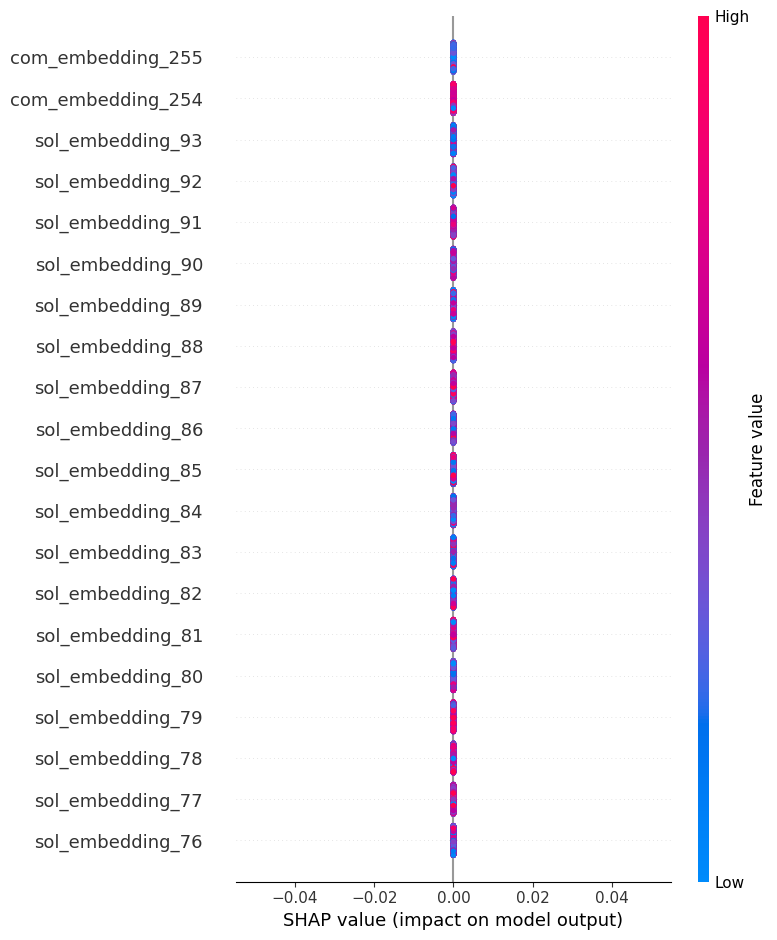

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import shap

# Load dataset
df = pd.read_csv('/content/sample_data/ML_DATASET.csv')
X = df.drop(columns=['Final_Marks'])  # Replace 'Final_Marks' with your target column
y = df['Final_Marks']

# Handle missing values
X = X.fillna(X.mean())  # Impute missing values in features
valid_indices = ~y.isnull()  # Identify rows with valid target values
X = X[valid_indices]
y = y[valid_indices]

# Define model
model = Lasso(random_state=42)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring_metrics = {
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'MAE': mean_absolute_error,
    'R2': r2_score,
    'MSE': mean_squared_error
}

# Cross-validation for Lasso
cv_results = {}
for metric_name, metric_func in scoring_metrics.items():
    # Adjust scoring for metrics that are lower better (MAE, MSE, RMSE)
    if metric_name in ['MAE', 'MSE']:
        # For MAE and MSE, use greater_is_better=False and negate the result manually
        scores = cross_val_score(model, X, y, scoring=make_scorer(metric_func, greater_is_better=False), cv=kf)
        cv_results[metric_name] = -np.mean(scores)  # Negate the score since lower is better
    else:
        # For R2 and RMSE, use greater_is_better=True, no negation needed
        scores = cross_val_score(model, X, y, scoring=make_scorer(metric_func, greater_is_better=True), cv=kf)
        cv_results[metric_name] = np.mean(scores)

print("Lasso Regression Cross-Validation Results:")
print(cv_results)

# Train the model on the entire dataset for SHAP explanation
model.fit(X, y)

# Create the SHAP explainer
explainer = shap.LinearExplainer(model, X)

# Get SHAP values for the entire dataset
shap_values = explainer.shap_values(X)

# Plot summary plot
shap.summary_plot(shap_values, X)

# If you want to visualize individual predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X.iloc[0])
